# Lab 06: Gene Expression

---
author: Jakub Szumny
date: October 18, 2024
embed-resources: true
---

## Introduction

Gene expression, the downstream of DNA, can give insight into the effects of DNA on phenotypical outcomes. This means that it can help with cancer detection which can significanlty improve survival. What we can look for in the gene expression, is the BRCA mutation, which is an example which can help better estimate the probability of developing breast cancer. As a data scientist working for a small biotechnology startup, I am tasked to explore the possibility of developing an universal cancer detection and classification model, using gene expression data. My goal is to simply work towards a proof of concept, and not to actually create a product. Knowing as the reader has worked with similar concepts as this report, I will not explain everything in huge detail. To do this I will be working with a classification machine learning model, and all the different gene expression.

## Methods

In [42]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

### Data

In [43]:
# load data
cancer_train = pd.read_parquet(
    "https://cs307.org/lab-06/data/cancer-train.parquet",
)
cancer_test = pd.read_parquet(
    "https://cs307.org/lab-06/data/cancer-test.parquet",
)

In [44]:
cancer_train

,cancer,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_1990,gene_1991,gene_1992,gene_1993,gene_1994,gene_1995,gene_1996,gene_1997,gene_1998,gene_1999
0,BRCA,0.0,3.149861,1.913454,5.562355,9.638586,0.0,4.302421,0.511670,0.000000,...,7.300691,8.383307,1.187198,0.000000,7.350471,0.0,4.634587,7.082415,9.727447,1.187198
1,LUAD,0.0,6.237034,5.043235,6.297397,10.391415,0.0,7.669941,0.913033,0.000000,...,6.322446,7.815595,13.809095,0.913033,7.651052,0.0,7.476074,4.733739,8.510863,0.000000
2,BRCA,0.0,3.856896,2.394981,6.758277,9.585513,0.0,7.409009,1.242023,0.000000,...,6.845515,9.194823,5.667696,0.000000,7.748253,0.0,5.567421,5.203158,7.364879,0.000000
3,PRAD,0.0,4.279924,3.606963,5.706613,9.716581,0.0,8.244226,0.402613,0.000000,...,6.598611,8.199118,5.024218,0.000000,7.607907,0.0,5.705281,6.278007,9.725383,0.000000
4,BRCA,0.0,3.359788,4.199986,6.144766,9.141834,0.0,9.014135,1.061776,0.626486,...,7.062651,9.670708,4.243707,0.000000,8.156811,0.0,7.363487,5.384844,8.703443,1.894876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,KIRC,0.0,3.069737,3.623200,6.744955,9.591219,0.0,7.254254,0.000000,0.000000,...,7.333665,8.365334,5.481444,0.000000,7.307674,0.0,5.723447,5.401791,9.067881,0.000000
124,BRCA,0.0,3.534497,3.064866,6.638882,10.010206,0.0,7.899387,0.000000,0.000000,...,7.080615,9.968912,10.501041,0.000000,8.866052,0.0,5.276806,4.941073,8.548240,0.000000
125,BRCA,0.0,4.087463,3.786596,6.385845,9.544964,0.0,8.062856,0.000000,0.000000,...,5.842979,9.931033,10.234817,0.000000,8.384568,0.0,7.033423,5.749534,8.132371,0.000000
126,LUAD,0.0,3.272889,4.529234,7.134909,9.504362,0.0,5.668893,0.000000,0.000000,...,7.300966,8.040350,11.972872,0.000000,7.592607,0.0,5.026256,6.137704,8.780947,1.167936


The data I will be working with is a gene expression and clinical outcome dataset. The data is from the Cancer Genome Atlas Pan-Cancer Analysis Project, and was accessed via synapse.org. The specific data for this research was collected and modified based on a submission to the UCI Irvine Machine Learning Repository.

The dataset includes:

## Response

- **cancer** `[object]`:  
  The clinically determined cancer type, represented as one of the following:
  - **BRCA**: Breast Invasive Carcinoma
  - **PRAD**: Prostate Adenocarcinoma
  - **KIRC**: Kidney Renal Clear Cell Carcinoma
  - **LUAD**: Lung Adenocarcinoma
  - **COAD**: Colon Adenocarcinoma

## Features

- **gene_** `[float64]`:  
  Gene expression quantification values, as measured by an Illumina HiSeq platform.

In [45]:
# summary statistics
print("Num of Samples: ", len(cancer_train))
print("Num of Features", cancer_train.shape[1] - 1)

Num of Samples:  128
Num of Features 2000


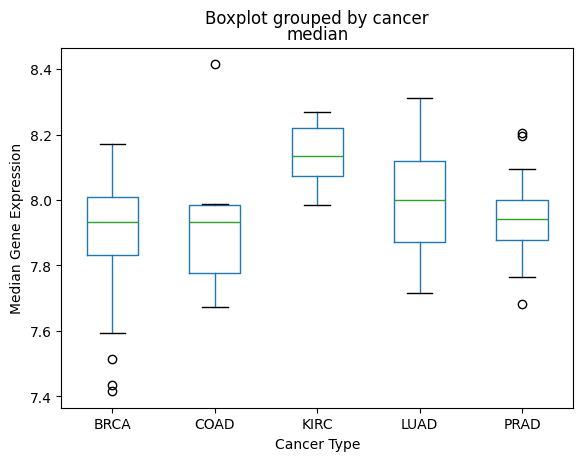

In [46]:
# visualizations
X = cancer_train.filter(regex="gene_")
y = cancer_train['cancer']
median = X.median(axis=1)
cancer_train['median'] = median
cancer_train.boxplot(column='median', by='cancer', grid=False)
plt.xlabel("Cancer Type")
plt.ylabel("Median Gene Expression")
plt.show()
cancer_train = cancer_train.drop(columns='median')



Based off of the summary statistics and visualizations, we can see how since there are 2000 different features, of all a similar type, it will be pretty simple to visualize this. Above I used a boxplot using the median gene expression vs the cancer type to see differences in the genes. As we can see the medians are pretty different for each different cancer type, which shows that there could be a possible difference that a model could possibly use to make predictions.

### Models

In [47]:
# process data for ML
# create X and y for train
X_train = cancer_train.drop(columns=["cancer"])
y_train = cancer_train["cancer"]

# create X and y for test
X_test = cancer_test.drop(columns=["cancer"])
y_test = cancer_test["cancer"]

In [48]:
# train models
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

# define preprocessing for numeric features
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

# define preprocessing for categorical features
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder()),
    ]
)

# combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# create pipeline, preprocess then classify
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier()),
    ]
)

In [49]:
# define parameter grid
param_grid = {
    "preprocessor__cat__onehot__drop": [None, "first"],
    "preprocessor__num__scaler": [None, StandardScaler()],
    "classifier__n_neighbors": [3, 5, 7, 9, 11],
    "classifier__metric": ["euclidean", "manhattan"],
}

# setup grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")

# run grid search with cross-validation
grid_search.fit(X_train, y_train)

# print best parameters found and best (cross-validated) score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3, 'preprocessor__cat__onehot__drop': None, 'preprocessor__num__scaler': None}
Best cross-validation accuracy: 0.9923076923076923


Here I used a pipeline and a grid search cross validation to find the best parameters for this model, using a KNearestNeighbors Classifier. I found that the best metric to use is euclidean, and the best n_neighbors is 3. From this I got a best cross-validation accuracy of 0.9923, which is incredibly good

## Results

In [50]:
# report model metrics
best =  grid_search.best_estimator_
y_pred = best.predict(X_test)
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")

from joblib import dump
dump(best, "gene-expression.joblib")

Test set accuracy: 1.0


['gene-expression.joblib']

On the test set, the model recieved a 1.0 test set accuracy is a perfect accuracy on this completeley new set of data which is amazing.

## Discussion

After receiving a test set accuracy of 1.0, I can definitely say the model is very good, and it definitely shows a proof of concept, and this could definitely be made a reality.

After making this very promising model that achieves a perfect accuracy on the test set, the next steps to do would definitely to introduce much more different cancers to the dataset, if not all cancers, which would allow the model to train on all the different types of cancer. As this model has a perfect accuracy, that model seemingly would do very well as well, but I'm sure there are some cancers which are very similar to one another on the gene level, so that could be a disadvantage to the model.

Another next step could be to group together many different cancers, and make individual models for each of those, hopefully all reaching a 1.0 accuracy. This hopefully would be able to used to predict any cancer, but it could also possibly falsly predict cancers, with the same problem as before.



### Conclusion

To conclude, given the highly accurate performance of this model, I would definitely say that there is proof of concept, and that this could definitely be made into a real model in the future. There will be challenges that arise with introducing different cancers to the dataset, but if it is taken step by step, this could be a very good cancer predictor. Obviously, I would not recommend this current model for use in the real world, as it is only trained and tested on a select few different cancers, but once it is introduced to more types, and also if it recieves a very good accuracy, it could definitely be used in the real world then. It is very important for the model to have a 100% accuracy, as there is no room for error in the medical world, as it could result in serious consequences.